<a href="https://colab.research.google.com/github/kanopf/Infidelity_detection/blob/main/infidality_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv('/content/Affairs.csv')

In [82]:
dataset

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...,...
596,1938,1,male,22.0,1.50,yes,1,12,2,5
597,1941,7,female,32.0,10.00,yes,2,18,5,4
598,1954,2,male,32.0,10.00,yes,2,17,6,5
599,1959,2,male,22.0,7.00,yes,3,18,6,2


In [85]:
list_afairrs = []
for i in dataset['affairs']:
  if i > 0:
    value_dummie = 1
  if i == 0:
    value_dummie = 0
  list_afairrs.append(value_dummie)
dataset['infidelity_dummie'] = list_afairrs

In [86]:
list_children = []
for i in dataset['children']:
  if i == 'yes':
    value_dummie = 1
  if i == 'no':
    value_dummie = 0
  list_children.append(value_dummie)
dataset['children_dummie'] = list_children

In [87]:
list_gender = []
for i in dataset['gender']:
  if i == 'male':
    value_dummie = 1
  if i == 'female':
    value_dummie = 0
  list_gender.append(value_dummie)
dataset['gender_dummie'] = list_gender

In [88]:
dataset

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,infidelity_dummie,children_dummie,gender_dummie
0,4,0,male,37.0,10.00,no,3,18,7,4,0,0,1
1,5,0,female,27.0,4.00,no,4,14,6,4,0,0,0
2,11,0,female,32.0,15.00,yes,1,12,1,4,0,1,0
3,16,0,male,57.0,15.00,yes,5,18,6,5,0,1,1
4,23,0,male,22.0,0.75,no,2,17,6,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1938,1,male,22.0,1.50,yes,1,12,2,5,1,1,1
597,1941,7,female,32.0,10.00,yes,2,18,5,4,1,1,0
598,1954,2,male,32.0,10.00,yes,2,17,6,5,1,1,1
599,1959,2,male,22.0,7.00,yes,3,18,6,2,1,1,1


In [89]:
dataset = dataset.drop('affairs', axis=1)
dataset = dataset.drop('children', axis=1)
dataset = dataset.drop('gender', axis=1)

In [91]:
dataset

,Unnamed: 0,age,yearsmarried,religiousness,education,occupation,rating,infidelity_dummie,children_dummie,gender_dummie
0,4,37.0,10.00,3,18,7,4,0,0,1
1,5,27.0,4.00,4,14,6,4,0,0,0
2,11,32.0,15.00,1,12,1,4,0,1,0
3,16,57.0,15.00,5,18,6,5,0,1,1
4,23,22.0,0.75,2,17,6,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...
596,1938,22.0,1.50,1,12,2,5,1,1,1
597,1941,32.0,10.00,2,18,5,4,1,1,0
598,1954,32.0,10.00,2,17,6,5,1,1,1
599,1959,22.0,7.00,3,18,6,2,1,1,1


In [92]:
(dataset['infidelity_dummie']).value_counts()

0    451
1    150
Name: infidelity_dummie, dtype: int64

In [93]:

df_variavel_0 = dataset[dataset['infidelity_dummie'] == 0].sample(n=150)


df_variavel_1 = dataset[dataset['infidelity_dummie'] == 1]


df_filtered = pd.concat([df_variavel_0, df_variavel_1])

In [94]:
(df_filtered['infidelity_dummie']).value_counts()

0    150
1    150
Name: infidelity_dummie, dtype: int64

In [95]:
df_filtered

,Unnamed: 0,age,yearsmarried,religiousness,education,occupation,rating,infidelity_dummie,children_dummie,gender_dummie
31,163,22.0,1.5,3,16,5,5,0,0,0
392,1704,57.0,15.0,3,18,5,2,0,1,0
316,1359,32.0,4.0,2,14,1,5,0,1,0
367,1584,37.0,10.0,4,16,1,5,0,1,0
143,717,52.0,15.0,2,18,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
596,1938,22.0,1.5,1,12,2,5,1,1,1
597,1941,32.0,10.0,2,18,5,4,1,1,0
598,1954,32.0,10.0,2,17,6,5,1,1,1
599,1959,22.0,7.0,3,18,6,2,1,1,1


In [96]:
df_0 = df_filtered[df_filtered['infidelity_dummie'] == 0].sample(frac=0.8)
df_1 = df_filtered[df_filtered['infidelity_dummie'] == 1].sample(frac=0.8)

df_test = pd.concat([df_filtered[df_filtered['infidelity_dummie'] == 0].drop(df_0.index),
                          df_filtered[df_filtered['infidelity_dummie'] == 1].drop(df_1.index)])
df_test = df_test.drop('Unnamed: 0', axis=1)

df_train = pd.concat([df_0,df_1])
df_train = df_train.drop('Unnamed: 0', axis=1)

In [ ]:
df_train

,age,yearsmarried,religiousness,education,occupation,rating,infidelity_dummie,children_dummie,gender_dummie
265,52.0,15.0,2,14,5,5,0,1,1
137,37.0,15.0,2,16,1,4,0,1,0
243,27.0,4.0,3,18,5,5,0,1,1
9,22.0,1.5,4,14,4,5,0,0,1
402,42.0,15.0,5,18,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...
554,37.0,15.0,3,17,6,3,1,1,1
452,27.0,4.0,3,17,1,5,1,1,0
453,37.0,15.0,5,18,6,2,1,1,1
590,27.0,7.0,4,16,1,2,1,1,0


In [142]:
df_train_for_train = df_train[['age','yearsmarried','religiousness','education','occupation','rating','children_dummie','gender_dummie']]

df_train_target = df_train[['infidelity_dummie']]


In [100]:
df_train_for_train.shape[1]

8

In [143]:
df_test_input = df_test[['age','yearsmarried','religiousness','education','occupation','rating','children_dummie','gender_dummie']]
df_test_real_output = df_test[['infidelity_dummie']]

In [ ]:
# Definindo o modelo
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=df_train_for_train.shape[1], activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer="adam", loss='binary_crossentropy')


history = model.fit(df_train_for_train, df_train_target, epochs=4000, verbose = 1)


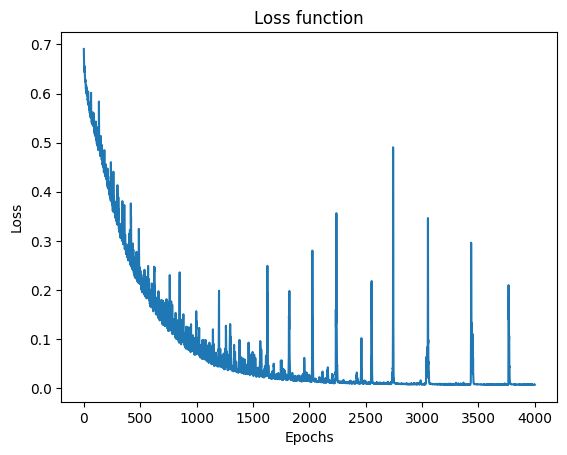

In [ ]:
# Plotar a função de perda
plt.plot(history.history['loss'])
plt.title('Loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
predictions_in_test = []
for index, row in df_test_input.iterrows():
    #print(row)
    sample = row.values  # Converter a linha em um array
    sample = sample.reshape(1, -1)  # Reshape para adequar às dimensões de entrada do modelo
    prediction = model.predict(sample)  # Fazer a previsão para a linha
    prediction = [1 if pred > 0.5 else 0 for pred in prediction]
    predictions_in_test.append(prediction[0])  # Armazenar a previsão

In [ ]:
predictions_in_train = []
for index, row in df_train_for_train.iterrows():
    #print(row)
    sample = row.values  # Converter a linha em um array
    sample = sample.reshape(1, -1)  # Reshape para adequar às dimensões de entrada do modelo
    prediction = model.predict(sample)  # Fazer a previsão para a linha
    prediction = [1 if pred > 0.5 else 0 for pred in prediction]
    predictions_in_train.append(prediction[0])  # Armazenar a previsão

In [146]:
#predictions in test set
predictions_in_tested = pd.DataFrame(predictions_in_test)
predictions_in_tested.columns = ['infidelity_dummie_tested']

#predictions in train set
predictions_in_trained = pd.DataFrame(predictions_in_train)
predictions_in_trained.columns = ['infidelity_dummie_trained']

In [ ]:
predictions_in_tested

In [147]:
#df_train_target

df_train_real_output = df_train_target.reset_index(drop=True)

#df_test_target

df_test_real_output = df_test_real_output.reset_index(drop=True)

In [ ]:

predictions_in_tested

In [149]:
#comparition with test real
comparition_test = df_test_real_output['infidelity_dummie'] == predictions_in_tested['infidelity_dummie_tested']

#comparition with train real
comparition_train = df_train_real_output['infidelity_dummie'] == predictions_in_trained['infidelity_dummie_trained']

In [151]:
comparition_test.value_counts()

True     47
False    13
dtype: int64

In [152]:
comparition_train.value_counts()

True     195
False     45
dtype: int64